dataset = https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

# **Load Dataset**

In [3]:
import pandas as pd
# Load the data
file_path = "/content/drive/MyDrive/CODEWAY/spam.csv"
df = pd.read_csv(file_path, encoding='latin-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Extract relevant columns and rename them

In [5]:
# Extract relevant columns and rename them
df = df[['v1', 'v2']]
df.columns = ['is_spam', 'message']

# Display the modified DataFrame
df.head()

,is_spam,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
df.describe()

,message_length
count,5572.000000
mean,80.118808
std,59.690841
min,2.000000
25%,36.000000
50%,61.000000
75%,121.000000
max,910.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   is_spam         5572 non-null   object
 1   message         5572 non-null   object
 2   message_length  5572 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [26]:
df.shape

(5572, 3)

In [25]:
df.isnull().sum()

is_spam           0
message           0
message_length    0
dtype: int64

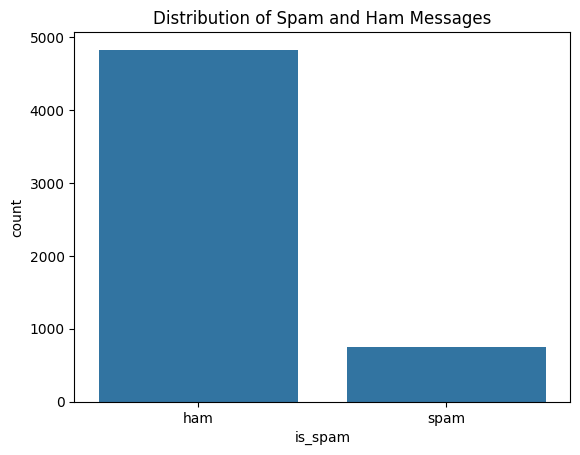

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
# Display the distribution of spam and ham messages
sns.countplot(x='is_spam', data=df)
plt.title('Distribution of Spam and Ham Messages')
plt.show()

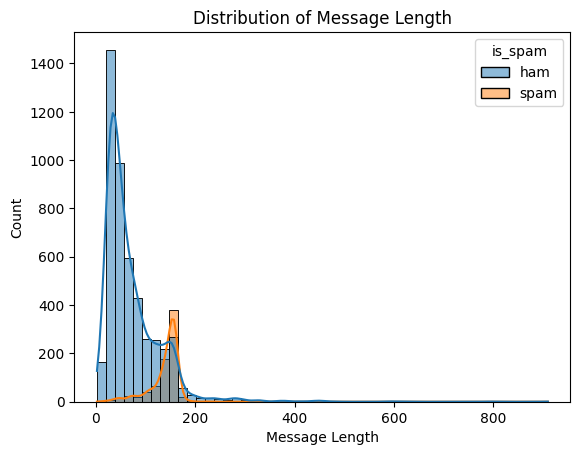

In [21]:
# Visualize the message length distribution
df['message_length'] = df['message'].apply(len)
sns.histplot(data=df, x='message_length', hue='is_spam', bins=50, kde=True)
plt.title('Distribution of Message Length')
plt.xlabel('Message Length')
plt.show()

# Important Libraries

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Data Spliting

In [8]:
# Assuming df is your DataFrame with 'is_spam' and 'message' columns
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['is_spam'], test_size=0.30, random_state=42)


# Create TF-IDF vectorizer


In [9]:
# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


# Train Naive Bayes model


In [10]:
# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predictions
nb_preds = nb_model.predict(X_test_tfidf)

# Evaluate Naive Bayes model


In [11]:
# Evaluate Naive Bayes model
nb_accuracy = accuracy_score(y_test, nb_preds)
print("Naive Bayes Accuracy:", nb_accuracy)
print(classification_report(y_test, nb_preds))


Naive Bayes Accuracy: 0.9599282296650717
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1453
        spam       1.00      0.69      0.82       219

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672



# Function to plot confusion matrix


In [16]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot Confusion Matrix for Naive Bayes


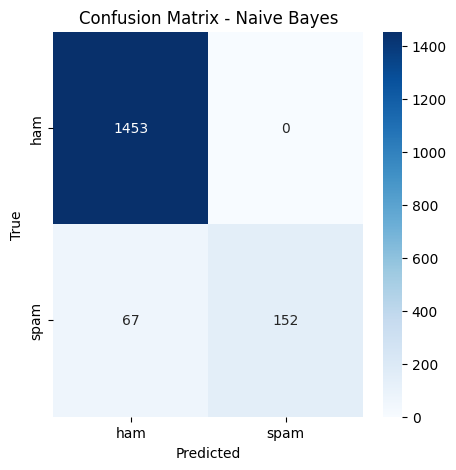

In [17]:
# Plot Confusion Matrix for Naive Bayes
plot_confusion_matrix(y_test, nb_preds, 'Confusion Matrix - Naive Bayes', ['ham', 'spam'])


# Train Logistic Regression model


In [12]:
# Train Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

# Predictions
lr_preds = lr_model.predict(X_test_tfidf)


# Evaluate Logistic Regression model


In [13]:
# Evaluate Logistic Regression model
lr_accuracy = accuracy_score(y_test, lr_preds)
print("Logistic Regression Accuracy:", lr_accuracy)
print(classification_report(y_test, lr_preds))

Logistic Regression Accuracy: 0.9659090909090909
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1453
        spam       0.99      0.74      0.85       219

    accuracy                           0.97      1672
   macro avg       0.98      0.87      0.92      1672
weighted avg       0.97      0.97      0.96      1672



# Plot Confusion Matrix for Logistic Regression


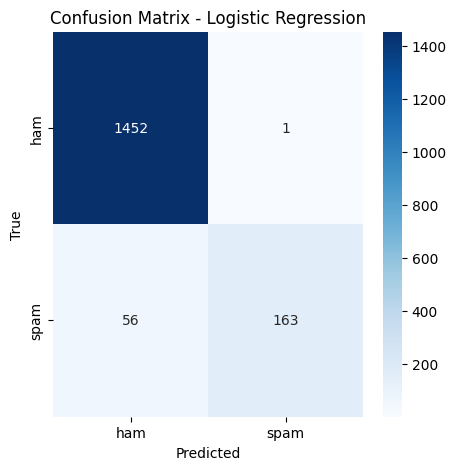

In [18]:
# Plot Confusion Matrix for Logistic Regression
plot_confusion_matrix(y_test, lr_preds, 'Confusion Matrix - Logistic Regression', ['ham', 'spam'])


# Train SVM model


In [14]:
from sklearn.svm import SVC

# Train SVM model
svm_model = SVC()
svm_model.fit(X_train_tfidf, y_train)

# Predictions
svm_preds = svm_model.predict(X_test_tfidf)


# Evaluate SVM model


In [15]:
# Evaluate SVM model
svm_accuracy = accuracy_score(y_test, svm_preds)
print("SVM Accuracy:", svm_accuracy)
print(classification_report(y_test, svm_preds))

SVM Accuracy: 0.9796650717703349
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1453
        spam       1.00      0.84      0.92       219

    accuracy                           0.98      1672
   macro avg       0.99      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672



# Plot Confusion Matrix for SVM


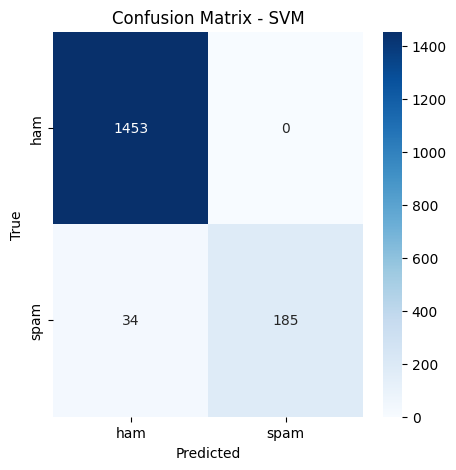

In [19]:

# Plot Confusion Matrix for SVM
plot_confusion_matrix(y_test, svm_preds, 'Confusion Matrix - SVM', ['ham', 'spam'])

## **Observations from the provided classification reports:**

**Naive Bayes:**
- Accuracy: 95.99%
- Precision for spam: 100%, Recall for spam: 69%
- High precision indicates that when the model predicts spam, it is correct almost every time. However, the recall is relatively low, suggesting that the model misses some spam messages.

**Logistic Regression:**
- Accuracy: 96.59%
- Precision for spam: 99%, Recall for spam: 74%
- Similar to Naive Bayes, high precision indicates strong performance when predicting spam, while recall suggests a moderate ability to identify spam messages. The overall accuracy is slightly higher compared to Naive Bayes.

**General Observations:**
- Both models perform well in terms of overall accuracy.
- The models have high precision for spam, indicating that when they predict a message as spam, they are usually correct.
- Recall for spam is lower, suggesting that there are spam messages that the models are not capturing. This is common in imbalanced datasets where legitimate messages outnumber spam messages.
- Logistic Regression shows a slightly better balance between precision and recall for spam compared to Naive Bayes.

In summary, while both models perform well in distinguishing spam and legitimate messages, there is room for improvement, especially in recall for spam. Fine-tuning model parameters or exploring different techniques might enhance the models' performance. Additionally, considering other metrics like ROC-AUC might provide a more comprehensive evaluation, especially in imbalanced datasets.